<a href="https://colab.research.google.com/github/Nasabunc09/Ingenias2025-DataScience/blob/main/Pre_Entrega4_DataScience/Modelo_no_supervisadoV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto 4x4 YPF - Primer pilar Vaca Muerta**

En esta etapa del proyecto 4x4, se aplicaron técnicas de Machine Learning no supervisado con el objetivo de explorar patrones ocultos en los datos energéticos sin necesidad de contar con una variable objetivo definida. El análisis se centró en identificar agrupamientos naturales entre las variables de producción de petróleo y producción de gas de YPF en Vaca Muerta. Esto permitió observar cómo se comportan los distintos años en función de estos indicadores clave, y detectar posibles trayectorias de desarrollo o períodos atípicos en el cumplimiento del plan.

Se utilizaron algoritmos como K-means, Mezcla Gaussiana para realizar el análisis de clústeres, luego se aplicó una reducción de dimensionalidad con PCA y Autoencoders (Redes Neuronales) para facilitar la visualización y mejorar la eficiencia del modelo. Se realizo una comparativa entre los modelos aplicados.

### Importamos las librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### Cargamos el dataset de Producción

In [2]:
#Se utilizo la función usecols para extraer las features mas reelevantes del dataset
produccion = pd.read_csv('/content/produccion.zip', usecols=['anio','mes','idpozo','empresa','tipopozo','tipoestado','prod_gas','prod_pet','profundidad','areayacimiento','cuenca','provincia','sub_tipo_recurso','prod_agua','tipoextraccion','profundidad','areapermisoconcesion','coordenadax','coordenaday','proyecto','clasificacion','subclasificacion'])
produccion

,anio,mes,idpozo,prod_pet,prod_gas,prod_agua,tipoextraccion,tipoestado,tipopozo,empresa,...,areapermisoconcesion,areayacimiento,cuenca,provincia,coordenadax,coordenaday,proyecto,clasificacion,subclasificacion,sub_tipo_recurso
0,2018,1,132488,0.000000,171.937000,0.000000,Surgencia Natural,Extracción Efectiva,Gasífero,YSUR ENERGÍA ARGENTINA S.R.L.,...,ESTACION FERNANDEZ ORO,ESTACION FERNANDEZ ORO,NEUQUINA,Rio Negro,-67.864960,-39.016722,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT
1,2017,1,130021,0.000000,245.850000,16.680000,Plunger Lift,Extracción Efectiva,Gasífero,YSUR ENERGÍA ARGENTINA S.R.L.,...,ANTICLINAL CAMPAMENTO,ANTICLINAL CAMPAMENTO SUR,NEUQUINA,Neuquén,-69.733102,-39.024859,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT
2,2018,1,132487,0.000000,514.696000,17.000000,Surgencia Natural,Extracción Efectiva,Gasífero,YSUR ENERGÍA ARGENTINA S.R.L.,...,ESTACION FERNANDEZ ORO,ESTACION FERNANDEZ ORO,NEUQUINA,Rio Negro,-67.837875,-39.019313,Sin Proyecto,EXPLOTACION,DESARROLLO,TIGHT
3,2015,1,137212,0.000000,422.110000,0.000000,Bombeo Mecánico,Extracción Efectiva,Gasífero,YSUR ENERGÍA ARGENTINA S.R.L.,...,AL NORTE DE LA DORSAL,GUANACO,NEUQUINA,Neuquén,-69.255971,-38.860779,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT
4,2018,1,132361,0.000000,217.103000,7.300000,Surgencia Natural,Extracción Efectiva,Gasífero,YSUR ENERGÍA ARGENTINA S.R.L.,...,AL NORTE DE LA DORSAL,GUANACO,NEUQUINA,Neuquén,-69.231360,-38.869270,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345377,2024,12,3640,14.049906,17.378994,72.385001,Bombeo Mecánico,Extracción Efectiva,Petrolífero,Petrolera Aconcagua Energia S.A.,...,ENTRE LOMAS,EL CARACOL,NEUQUINA,Neuquén,-68.452390,-37.954170,Sin Proyecto,EXPLOTACION,AVANZADA,SHALE
345378,2023,12,164872,0.000000,0.000000,0.000000,NaN,NaN,NaN,Petrolera Aconcagua Energia S.A.,...,ENTRE LOMAS,CHARCO BAYO,NEUQUINA,Rio Negro,-68.099940,-38.174340,Sin Proyecto,EXPLOTACION,DESARROLLO,TIGHT
345379,2024,12,164374,60.960855,602.844409,63.852351,Surgencia Natural,Extracción Efectiva,Petrolífero,Petrolera Aconcagua Energia S.A.,...,ENTRE LOMAS,CHARCO BAYO,NEUQUINA,Rio Negro,-68.106619,-38.178494,Sin Proyecto,EXPLOTACION,DESARROLLO,TIGHT
345380,2024,12,164873,0.000000,0.000000,0.000000,Surgencia Natural,Parado Transitoriamente,Gasífero,Petrolera Aconcagua Energia S.A.,...,ENTRE LOMAS,CHARCO BAYO,NEUQUINA,Rio Negro,-68.129670,-38.149710,Sin Proyecto,EXPLOTACION,DESARROLLO,TIGHT


### Primer filtro del dataset

In [3]:
#Filtro por cada dataset solo los registros para YPF S.A., para la cuenca Neuquina y a partir del año 2021 inclusive
prod_ypf = produccion[(produccion['empresa'] == 'YPF S.A.')&(produccion['cuenca'] == 'NEUQUINA')&(produccion['anio']>2020)]

prod_ypf

,anio,mes,idpozo,prod_pet,prod_gas,prod_agua,tipoextraccion,tipoestado,tipopozo,empresa,...,areapermisoconcesion,areayacimiento,cuenca,provincia,coordenadax,coordenaday,proyecto,clasificacion,subclasificacion,sub_tipo_recurso
7721,2022,1,145736,361.88,56.60,0.00,Plunger Lift,Extracción Efectiva,Petrolífero,YPF S.A.,...,LOMA CAMPANA,LOMA CAMPANA,NEUQUINA,Neuquén,-68.602972,-38.347494,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE
7723,2022,1,153001,0.27,47.84,41.61,Plunger Lift,Extracción Efectiva,Gasífero,YPF S.A.,...,RINCON DEL MANGRULLO,RINCON DEL MANGRULLO,NEUQUINA,Neuquén,-69.342559,-38.565581,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT
7725,2022,1,146996,0.00,12.09,2.83,Surgencia Natural,Extracción Efectiva,Gasífero,YPF S.A.,...,LOMA LA LATA - SIERRA BARROSA,CUPEN MAHUIDA,NEUQUINA,Neuquén,-68.933269,-38.749028,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT
7727,2022,1,145718,50.43,24.68,99.83,Plunger Lift,Extracción Efectiva,Petrolífero,YPF S.A.,...,LOMA CAMPANA,LOMA CAMPANA-LLL,NEUQUINA,Neuquén,-68.869480,-38.330964,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE
7729,2022,1,145714,0.00,0.00,0.00,Bombeo Mecánico,Parado Transitoriamente,Petrolífero,YPF S.A.,...,LOMA CAMPANA,LOMA CAMPANA-LLL,NEUQUINA,Neuquén,-68.867956,-38.327995,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199438,2024,12,166128,0.00,0.00,0.00,Sin Sistema de Extracción,En Inyección Efectiva,Sumidero,YPF S.A.,...,AGUADA DEL CHAÑAR,LOMA COLORADA,NEUQUINA,Neuquén,-68.525949,-38.122077,Sin Proyecto,SERVICIO,CONTROL,SHALE
199440,2024,12,166126,1642.63,101.18,1102.79,Surgencia Natural,Extracción Efectiva,Petrolífero,YPF S.A.,...,AGUADA DEL CHAÑAR,LOMA COLORADA,NEUQUINA,Neuquén,-68.558082,-38.076855,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE
199442,2024,12,166127,2441.10,153.31,1287.65,Surgencia Natural,Extracción Efectiva,Petrolífero,YPF S.A.,...,AGUADA DEL CHAÑAR,LOMA COLORADA,NEUQUINA,Neuquén,-68.558013,-38.076854,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE
199446,2024,12,166133,0.00,0.00,0.00,Surgencia Natural,Parado Transitoriamente,Gasífero,YPF S.A.,...,LAS TACANAS,LAS TACANAS,NEUQUINA,Neuquén,-69.335181,-38.710951,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE


### Renombrar features

In [6]:
#Con rename se logró renombrar las columnas que tenían nombres abreviados o poco legibles
prod_ypf=prod_ypf.rename(columns={'anio':'Año','mes':'Mes','idpozo':'ID pozo','prod_pet':'Produccion de Petroleo','prod_gas':'Produccion de Gas','prod_agua':'Produccion de agua','tipoextraccion':'Tipo de extraccion','tipoestado':'Tipo de estado','tipopozo':'Tipo de pozo','empresa':'Empresa','profundidad':'Profundidad','areapermisoconcesion':'Area de permiso de concesion','cuenca':'Cuenca','provincia':'Provincia','proyecto':'Proyecto','clasificacion':'Clasificacion','subclasificacion':'Subclasificacion','sub_tipo_recurso':'Subtipo de recurso'})
prod_ypf

,Año,Mes,ID pozo,Produccion de Petroleo,Produccion de Gas,Produccion de agua,Tipo de extraccion,Tipo de estado,Tipo de pozo,Empresa,...,Area de permiso de concesion,areayacimiento,Cuenca,Provincia,coordenadax,coordenaday,Proyecto,Clasificacion,Subclasificacion,Subtipo de recurso
7721,2022,1,145736,361.88,56.60,0.00,Plunger Lift,Extracción Efectiva,Petrolífero,YPF S.A.,...,LOMA CAMPANA,LOMA CAMPANA,NEUQUINA,Neuquén,-68.602972,-38.347494,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE
7723,2022,1,153001,0.27,47.84,41.61,Plunger Lift,Extracción Efectiva,Gasífero,YPF S.A.,...,RINCON DEL MANGRULLO,RINCON DEL MANGRULLO,NEUQUINA,Neuquén,-69.342559,-38.565581,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT
7725,2022,1,146996,0.00,12.09,2.83,Surgencia Natural,Extracción Efectiva,Gasífero,YPF S.A.,...,LOMA LA LATA - SIERRA BARROSA,CUPEN MAHUIDA,NEUQUINA,Neuquén,-68.933269,-38.749028,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT
7727,2022,1,145718,50.43,24.68,99.83,Plunger Lift,Extracción Efectiva,Petrolífero,YPF S.A.,...,LOMA CAMPANA,LOMA CAMPANA-LLL,NEUQUINA,Neuquén,-68.869480,-38.330964,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE
7729,2022,1,145714,0.00,0.00,0.00,Bombeo Mecánico,Parado Transitoriamente,Petrolífero,YPF S.A.,...,LOMA CAMPANA,LOMA CAMPANA-LLL,NEUQUINA,Neuquén,-68.867956,-38.327995,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199438,2024,12,166128,0.00,0.00,0.00,Sin Sistema de Extracción,En Inyección Efectiva,Sumidero,YPF S.A.,...,AGUADA DEL CHAÑAR,LOMA COLORADA,NEUQUINA,Neuquén,-68.525949,-38.122077,Sin Proyecto,SERVICIO,CONTROL,SHALE
199440,2024,12,166126,1642.63,101.18,1102.79,Surgencia Natural,Extracción Efectiva,Petrolífero,YPF S.A.,...,AGUADA DEL CHAÑAR,LOMA COLORADA,NEUQUINA,Neuquén,-68.558082,-38.076855,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE
199442,2024,12,166127,2441.10,153.31,1287.65,Surgencia Natural,Extracción Efectiva,Petrolífero,YPF S.A.,...,AGUADA DEL CHAÑAR,LOMA COLORADA,NEUQUINA,Neuquén,-68.558013,-38.076854,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE
199446,2024,12,166133,0.00,0.00,0.00,Surgencia Natural,Parado Transitoriamente,Gasífero,YPF S.A.,...,LAS TACANAS,LAS TACANAS,NEUQUINA,Neuquén,-69.335181,-38.710951,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE


### Histogramas

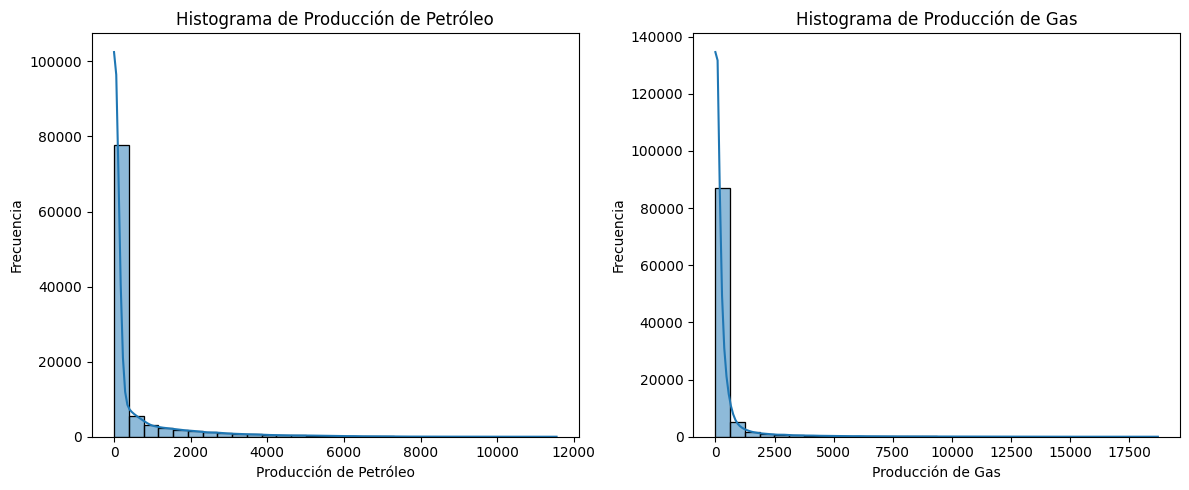

In [9]:
# Histogramas de Producción de petróleo y Producción de gas

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=prod_ypf, x='Produccion de Petroleo', bins=30, kde=True)
plt.title('Histograma de Producción de Petróleo')
plt.xlabel('Producción de Petróleo')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.histplot(data=prod_ypf, x='Produccion de Gas', bins=30, kde=True)
plt.title('Histograma de Producción de Gas')
plt.xlabel('Producción de Gas')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

**Interpretación Producción Petróleo**

*Forma:*
Si el histograma muestra una forma simétrica (parecida a una campana) con el kde=True, podría indicar una distribución aproximadamente normal.

*Sesgo (skewness):*
Si los datos están concentrados hacia la izquierda con una cola a la derecha (derechamente sesgada), significa que la mayoría de las producciones son bajas, pero hay algunos meses con picos de producción más altos.
Si es al revés (cola hacia la izquierda), es menos común, pero puede indicar que la producción suele ser alta, con algunos valores inusualmente bajos.

*Número de picos:*
Si hay más de un pico, podrías estar viendo un comportamiento multimodal, lo que sugiere que hay diferentes grupos o períodos con distintos niveles de producción.

**Interpretación Producción Gas**

*Comparación con petróleo:*
¿La forma es parecida? Si ambos tienen formas similares, es posible que haya una correlación entre la producción de gas y petróleo.

*Dispersión:*
Si la curva es más extendida (más ancha), indica mayor variabilidad en la producción de gas a lo largo del tiempo.

*Outliers:*
Valores aislados o picos extremos pueden indicar eventos anómalos (por ejemplo, cortes operativos, descubrimientos o nuevas perforaciones).

### Segundo filtro del dataset

Filtramos el dataset para las features Producción de Petróleo y Producción de Gas para obtener solo aquellos valores mayores a cero.

In [10]:
df_filtrado = prod_ypf[(prod_ypf['Produccion de Petroleo'] > 0) & (prod_ypf['Produccion de Gas'] > 0)]
#verificamos que una vez filtrado, el dataset quedo con  menos registros
df_filtrado.shape

(64172, 21)

# Transformación de variables

In [11]:
print(df_filtrado.columns.tolist())

['Año', 'Mes', 'ID pozo', 'Produccion de Petroleo', 'Produccion de Gas', 'Produccion de agua', 'Tipo de extraccion', 'Tipo de estado', 'Tipo de pozo', 'Empresa', 'Profundidad', 'Area de permiso de concesion', 'areayacimiento', 'Cuenca', 'Provincia', 'coordenadax', 'coordenaday', 'Proyecto', 'Clasificacion', 'Subclasificacion', 'Subtipo de recurso']


In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pandas as pd

# Selección de columnas válidas que sí existen
columnas = [
    'Produccion de Petroleo',
    'Produccion de Gas',
    'Produccion de agua',
    'Profundidad',
    'Tipo de pozo',
    'Subtipo de recurso',
    'Area de permiso de concesion'
]

# Filtrado y eliminación de nulos
df_filtrado = df_filtrado[columnas].dropna()

# Columnas categóricas
categorical_cols = [
    'Tipo de pozo',
    'Subtipo de recurso',
    'Area de permiso de concesion'
]
# Codificación
column_transformer = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(sparse_output=False), categorical_cols)],
    remainder='passthrough'
)

# Aplicar transformación
df_encoded_array = column_transformer.fit_transform(df_filtrado)
feature_names = column_transformer.get_feature_names_out()
df_encoded = pd.DataFrame(df_encoded_array, columns=feature_names)

# Escalado (opcional pero recomendado)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded)

# Técnicas aprendizaje no supervisado

## **Clustering**

## **K-Means**

El algoritmo K-Means es un modelo de aprendizaje no supervisado que se utiliza para identificar grupos o patrones ocultos dentro de un conjunto de datos sin necesidad de etiquetas previas.

Su objetivo es dividir los datos en k clústeres distintos, de manera que los puntos dentro de cada clúster sean lo más similares entre sí posible (alta cohesión), y lo más distintos de los otros grupos (alta separación).

Esto se logra asignando cada observación al clúster con el centroide más cercano, y actualizando esos centroides de forma iterativa hasta alcanzar la convergencia.

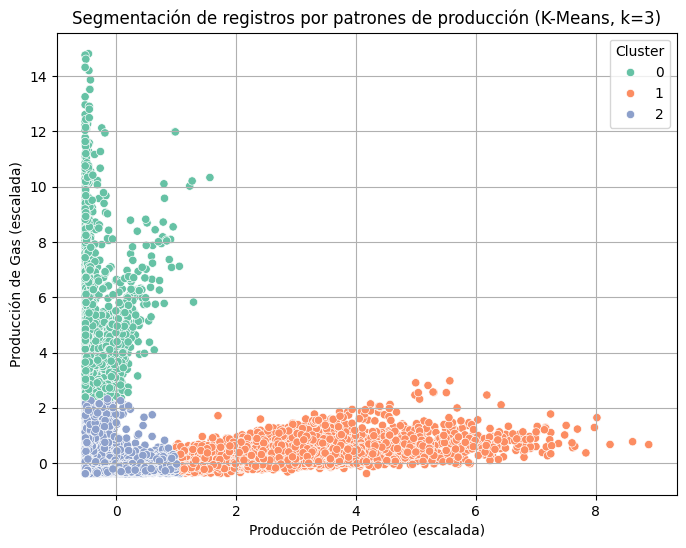

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar variables numéricas
X = df_filtrado[['Produccion de Petroleo', 'Produccion de Gas']].dropna()

# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Visualizar
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=labels, palette='Set2')
plt.xlabel('Producción de Petróleo (escalada)')
plt.ylabel('Producción de Gas (escalada)')
plt.title('Segmentación de registros por patrones de producción (K-Means, k=3)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


El gráfico muestra los resultados del modelo de clustering K-Means aplicado sobre los datos de Producción de Petróleo y Producción de Gas, ambos valores previamente escalados.

Cada punto representa un registro, y el color indica el clúster al que fue asignado según su patrón de producción.

Se identificaron tres grupos diferenciados:

* Cluster 1 (naranja): alta producción de petróleo y baja de gas.

* Cluster 0 (verde): alta producción de gas con baja producción de petróleo.

* Cluster 2 (azul): baja producción tanto de petróleo como de gas.

Este análisis permite distinguir perfiles de pozos o comportamientos productivos que pueden ser relevantes para la toma de decisiones técnicas o económicas.

### Gráfico con centroides

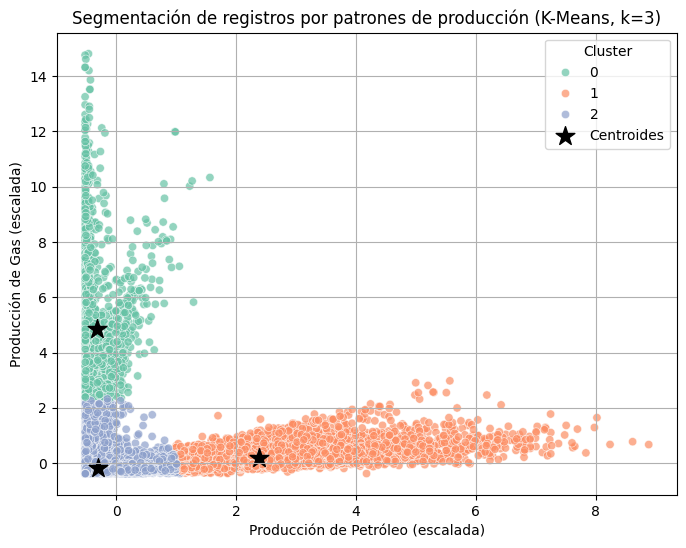

In [14]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar variables numéricas
X = df_filtrado[['Produccion de Petroleo', 'Produccion de Gas']].dropna()

# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Visualizar con centroides
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=labels, palette='Set2', alpha=0.7)

# AGREGAR CENTROIDES
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, marker='*', label='Centroides')

# Estética
plt.xlabel('Producción de Petróleo (escalada)')
plt.ylabel('Producción de Gas (escalada)')
plt.title('Segmentación de registros por patrones de producción (K-Means, k=3)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


### Método Elbow

El gráfico muestra cómo varía la inercia (suma de errores dentro de los clústeres) al incrementar el número de clústeres (k) en el algoritmo K-Means.
A medida que aumenta k, la inercia disminuye, pero con rendimientos decrecientes.

Se observa un "codo" pronunciado en k = 3, lo que sugiere que tres clústeres representan una buena segmentación del conjunto de datos, logrando un balance entre simplicidad del modelo y buena separación de grupos.

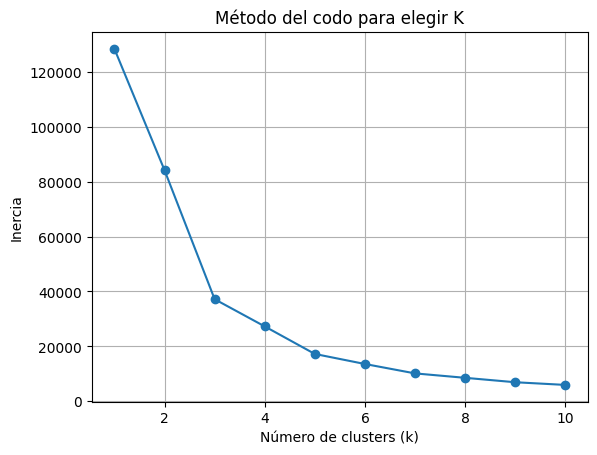

In [15]:
from sklearn.cluster import KMeans

inertias = []
K = range(1, 11)

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.plot(K, inertias, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del codo para elegir K')
plt.grid(True)
plt.show()


### Silhouette Score

El Silhouette Score mide la calidad del agrupamiento realizado por el modelo K-Means, considerando tanto la cohesión interna de los datos dentro de cada clúster como la separación entre clústeres.

En este caso, el valor obtenido fue de 0.746, lo que indica que los grupos formados están bien definidos, claramente separados entre sí y con una buena consistencia interna.

Este resultado respalda la elección de k = 3 como una segmentación adecuada para los datos de producción de petróleo y gas.

In [16]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X_scaled, kmeans.labels_)
print("Silhouette Score:", sil_score)


Silhouette Score: 0.7461589984807048


### Gráfico Silhouette

El gráfico de Silhouette representa, para cada punto, su nivel de pertenencia al clúster asignado. Las barras más largas indican puntos bien agrupados.
Se observa que la mayoría de las muestras tienen un valor positivo de silueta, lo cual confirma que los clústeres están bien definidos y que k=3 fue una elección adecuada.

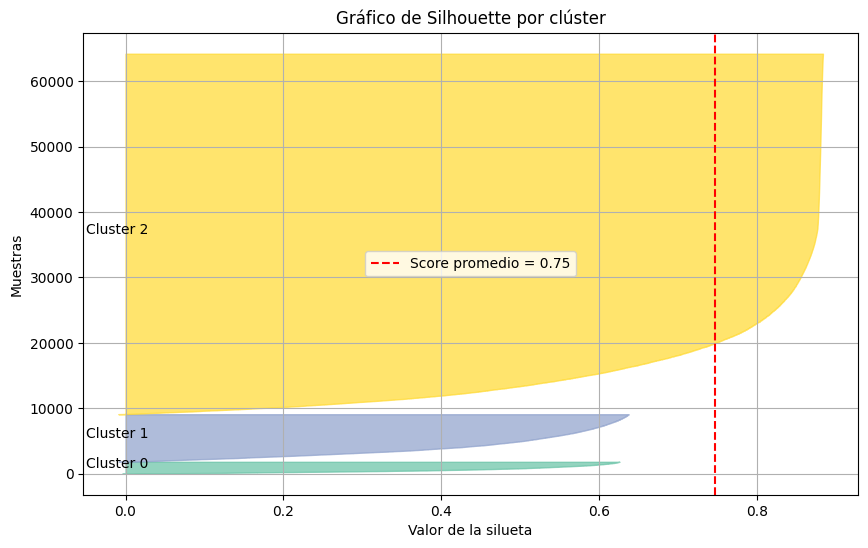

In [17]:
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt
import numpy as np

# Calcular siluetas individuales
silhouette_vals = silhouette_samples(X_scaled, labels)
k = 3

# Inicializar gráfico
plt.figure(figsize=(10, 6))
y_lower = 10

for i in range(k):
    # Extraer valores del clúster i
    ith_cluster_silhouette_vals = silhouette_vals[labels == i]
    ith_cluster_silhouette_vals.sort()
    size_cluster_i = ith_cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.Set2(i / k)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_vals,
                      facecolor=color, edgecolor=color, alpha=0.7)

    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, f'Cluster {i}')
    y_lower = y_upper + 10

# Línea del promedio general
sil_avg = silhouette_score(X_scaled, labels)
plt.axvline(sil_avg, color="red", linestyle="--", label=f'Score promedio = {sil_avg:.2f}')

# Estética
plt.xlabel("Valor de la silueta")
plt.ylabel("Muestras")
plt.title("Gráfico de Silhouette por clúster")
plt.legend()
plt.grid(True)
plt.show()


## **Mezcla Gaussiana**
Uno de los problemas con k-means es que los datos deben seguir un formato circular. La forma en que k-means calcula la distancia entre puntos de datos tiene que ver con una ruta circular, por lo que los datos no circulares no se agrupan correctamente.

Este es un problema que corrigen los modelos de mezcla Gaussianos. No necesitas datos con forma circular para que funcione bien.

El modelo de mezcla Gaussiana utiliza múltiples distribuciones Gaussianas para ajustar datos que tienen formas arbitrarias.

Hay varios modelos Gaussianos únicos que actúan como capas ocultas en este modelo híbrido. Entonces, el modelo calcula la probabilidad de que un punto de datos pertenezca a una distribución Gaussiana específica y ese es el grupo en el que se ubicará.

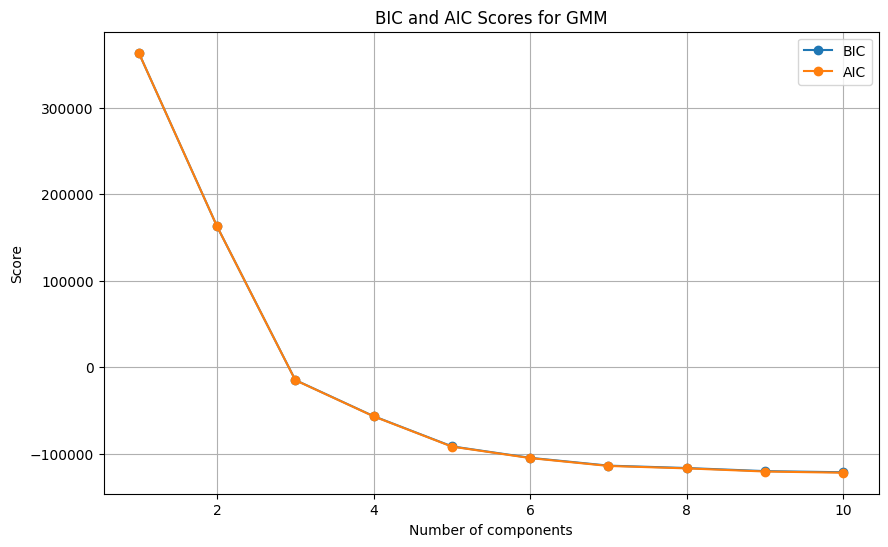

In [18]:
#Características numéricas relevantes y manejar los valores faltantes
X_gmm = df_filtrado[['Produccion de Petroleo', 'Produccion de Gas']].dropna()

#Estandarizar las características seleccionadas para el clustering del Modelo
scaler = StandardScaler()
X_gmm_scaled = scaler.fit_transform(X_gmm)

#Librerias GaussianMixture
#Calcula las puntuaciones BIC y AIC para diferentes números de componentes para encontrar el número óptimo.
from sklearn.mixture import GaussianMixture

bic_scores = []
aic_scores = []
n_components_range = range(1, 11)

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(X_gmm_scaled)
    bic_scores.append(gmm.bic(X_gmm_scaled))
    aic_scores.append(gmm.aic(X_gmm_scaled))

plt.figure(figsize=(10, 6))
plt.plot(n_components_range, bic_scores, marker='o', label='BIC')
plt.plot(n_components_range, aic_scores, marker='o', label='AIC')
plt.xlabel('Number of components')
plt.ylabel('Score')
plt.title('BIC and AIC Scores for GMM')
plt.legend()
plt.grid(True)
plt.show()

📉 ¿Cómo se interpretan AIC y BIC?


Cuanto más bajo es el valor de AIC o BIC, mejor es el modelo.

Ambos criterios buscan un equilibrio entre:
✔ buena capacidad de ajuste del modelo (log-likelihood),
❌ y evitar sobreajuste (penalizando por demasiados parámetros).

En el gráfico:

Los valores caen fuertemente entre 1 y 4 componentes.

Luego, la mejora se vuelve marginal: se “aplanan” las curvas (especialmente BIC).

Esto sugiere que a partir de cierto punto (por ejemplo, 4 o 5 clusters), agregar más componentes ya no mejora significativamente el modelo.

En resumen este gráfico te permite decidir cuántos clusters usar para agrupar tus datos con GMM:

* Te sugiere que hay alrededor de 4–5 grupos “naturales”.

* Más clusters sí mejoran AIC, pero ya no lo suficiente como para justificar su complejidad (según BIC).

* Usar tanto AIC como BIC ayuda a tomar una decisión más equilibrada.

**Ajustar el GMM a los datos escalados con el número óptimo de componentes**

In [20]:
from sklearn.mixture import GaussianMixture

# Crea una instancia de GaussianMixture con el número óptimo de componentes elegido (según el análisis BIC/AIC anterior, supongamos 3 para la demostración)
gmm = GaussianMixture(n_components=3, random_state=42)

# Ajusta el modelo GMM a los datos escalados
gmm.fit(X_gmm_scaled)

# Predice las etiquetas del clúster
gmm_labels = gmm.predict(X_gmm_scaled)

# Agrega las etiquetas de clúster previstas al DataFrame df_filtrado original
df_filtrado.loc[:, 'gmm_cluster_label'] = gmm_labels

display(df_filtrado.head())

,Produccion de Petroleo,Produccion de Gas,Produccion de agua,Profundidad,Tipo de pozo,Subtipo de recurso,Area de permiso de concesion,gmm_cluster_label
7721,361.88,56.60,0.00,3188.0,Petrolífero,SHALE,LOMA CAMPANA,1
7723,0.27,47.84,41.61,1867.0,Gasífero,TIGHT,RINCON DEL MANGRULLO,2
7727,50.43,24.68,99.83,3030.0,Petrolífero,SHALE,LOMA CAMPANA,2
7731,15.92,17.72,35.35,3060.0,Petrolífero,SHALE,LOMA CAMPANA,2
7733,2.04,26.65,3.39,3030.0,Petrolífero,SHALE,LOMA CAMPANA,2


¿Qué nos dio como resultado?
Un DataFrame enriquecido, donde cada fila ahora tiene:

*   Sus varables originales
*   Una nueva etiqueta que indica a qué grupo GMM pertenece.

Esto permite:

*   Analizar perfiles de clústeres.
*   Visualizar grupos en 2D/3D.
*   Comparar con otros métodos de clustering.

| Característica        | GMM                       | K-Means  |
| --------------------- | ------------------------- | -------- |
| Forma del clúster     | Elíptica (probabilística) | Esférica |
| Asigna probabilidades | Sí                        | No       |
| Más flexible          | ✅                         | ❌        |


### Visualizar los resultados del clustering GMM

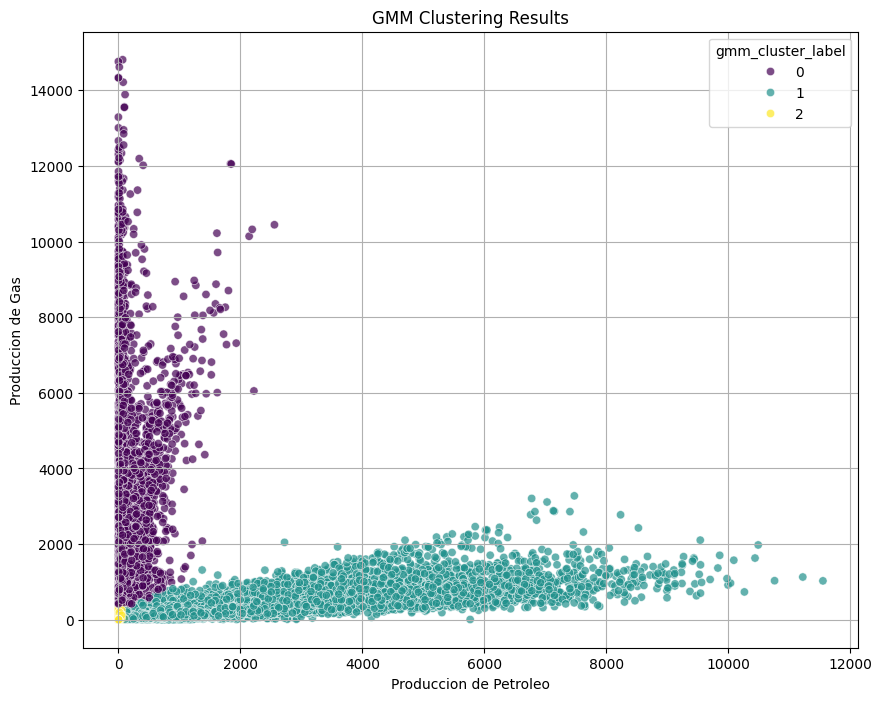

In [21]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_filtrado, x='Produccion de Petroleo', y='Produccion de Gas', hue='gmm_cluster_label', palette='viridis', alpha=0.7)
plt.xlabel('Produccion de Petroleo')
plt.ylabel('Produccion de Gas')
plt.title('GMM Clustering Results')
plt.grid(True)
plt.show()

¿Para qué sirve este gráfico?
* Visualizar cómo GMM agrupó los datos en función de la producción de petróleo y gas.

* Ver si los clústeres están bien separados o se superponen.

* Identificar posibles agrupaciones naturales, anomalías o segmentos con características similares.

## Silhouette Score

Calcular e imprimir la puntuación de silueta para evaluar la calidad del agrupamiento GMM


In [22]:
from sklearn.metrics import silhouette_score

# Calcula la puntuación de silueta utilizando los datos escalados y las etiquetas del grupo GMM
sil_score_gmm = silhouette_score(X_gmm_scaled, df_filtrado['gmm_cluster_label'])


# Imprime la puntuación de silueta calculada
print("GMM Silhouette Score:", sil_score_gmm)

GMM Silhouette Score: 0.3459196993647145


El Silhouette Score varía entre -1 y 1:

Cerca de 1: agrupamiento bien definido (los puntos están bien dentro de su clúster y lejos de otros).

Cerca de 0: los clústeres se superponen o no están bien separados.

Negativo: muchos puntos están en el clúster equivocado.

**Análisis Modelo Mezcla Gaussiana**

El análisis se centró en la agrupación de datos basada en «Producción de Petróleo» y «Producción de Gas».
Se eliminaron los valores que faltaban en las características seleccionadas, lo que dio como resultado 856 puntos de datos para el análisis.
Las características seleccionadas se estandarizaron utilizando StandardScaler.
Se calcularon las puntuaciones BIC y AIC para un intervalo de 1 a 10 componentes a fin de determinar el número óptimo de conglomerados para el MMG. El gráfico de estas puntuaciones indica que 3 componentes podría ser una elección razonable, tal como se utilizó en el paso posterior de aplicación del MMG.
Se aplicó un Modelo de Mezcla Gaussiana con 3 componentes, y las etiquetas de cluster predichas se añadieron al DataFrame original.
Se visualizaron los resultados del clustering GMM, mostrando tres clusters distintos basados en “Producción de Petróleo” y “Producción de Gas”.
Se calculó que la puntuación de la silueta para la agrupación GMM era de aproximadamente 0,346.

Conclusiones:
La puntuación de la silueta de 0,346 sugiere que, aunque los conglomerados están algo separados, hay margen para mejorar la definición de los conglomerados. Una investigación más profunda de las características de cada conglomerado podría proporcionar una visión más específica del dominio.


## **Reducción de la dimensionalidad**

## PCA - Análisis de Componentes Principales

El PCA es una técnica estadística y de aprendizaje automático que permite transformar un conjunto de variables posiblemente correlacionadas en un conjunto más pequeño de variables no correlacionadas llamadas componentes principales. Estas nuevas variables resumen la mayor parte de la variabilidad de los datos originales con la menor pérdida de información posible.

El objetivo principal del PCA es reducir la cantidad de dimensiones (variables) de un dataset manteniendo la mayor cantidad de información relevante, lo que facilita la visualización, el procesamiento y el análisis.

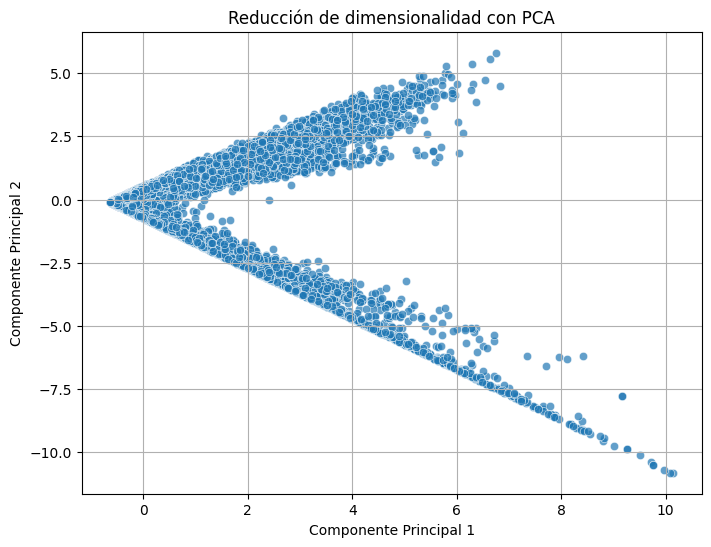

In [23]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Selección de variables numéricas
X = df_filtrado[['Produccion de Petroleo', 'Produccion de Gas']].dropna()

# 2. Escalado de los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Aplicar PCA (a 2 componentes para visualización)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 4. Crear DataFrame con componentes principales
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# 5. Visualización
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', alpha=0.7)
plt.title('Reducción de dimensionalidad con PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()


🔎 ¿Qué significa la forma?

La nube de puntos tiene forma de abanico o “punta de flecha”, igual que en el autoencoder, lo que indica:

Que hay una estructura interna fuerte en los datos.

Las observaciones se distribuyen a lo largo de un eje principal (Componente 1), probablemente relacionado con un patrón temporal, con volumen de producción o madurez del pozo.

La apertura hacia arriba y hacia abajo del gráfico (a lo largo del eje Y) sugiere la existencia de dos grandes tipos de comportamiento en los datos:

* Zona superior: observaciones con un conjunto de características específicas (por ejemplo: pozos más estables, mayor gas o presión).

* Zona inferior: observaciones con otras características (por ejemplo: pozos en declinación, más agua, menos presión).

Además, la densidad central indica que muchos datos comparten un comportamiento intermedio.

In [24]:
# Mostrar la varianza explicada
var_exp = pca.explained_variance_ratio_
print(f"Varianza explicada por PC1: {var_exp[0]:.2%}")
print(f"Varianza explicada por PC2: {var_exp[1]:.2%}")

Varianza explicada por PC1: 54.11%
Varianza explicada por PC2: 45.89%


Al tener solo dos variables originales, PCA conserva el 100% de la información al reducirlas a dos componentes principales. La PC1 explica el 54.11% de la variabilidad total y la PC2 el 45.89%, lo que indica que ambas contribuyen casi por igual a la estructura de los datos.

#Autoencoder para reducción a 2D

Un autoencoder para reducción a 2D es un tipo de red neuronal que aprende a representar tus datos originales —que pueden tener muchas variables— en solo 2 dimensiones, de manera que conserve la mayor cantidad de información posible sobre la estructura y relaciones entre los datos.

🎯 ¿Para qué sirve en reducción de dimensionalidad?
Un autoencoder para reducción a 2D sirve para:

✅ Visualización:

Al reducir los datos a 2 dimensiones (Dim1 y Dim2), podés visualizar en un gráfico disperso (scatterplot) cómo se relacionan tus observaciones.

Es útil para encontrar patrones, agrupamientos o outliers.

✅ Compresión de información:

Captura las relaciones más importantes entre las variables originales (incluso no lineales).

A diferencia de PCA, un autoencoder puede modelar estructuras complejas no lineales.

✅ Preprocesamiento para análisis posteriores:

La representación 2D puede usarse como entrada para algoritmos de clustering (como KMeans, DBSCAN) o para detección de anomalías.

✅ Reducción para aprendizaje supervisado:

Si tenés muchas variables pero pocas observaciones, usar una versión reducida (2D, 3D, etc.) puede mejorar el rendimiento de modelos predictivos.

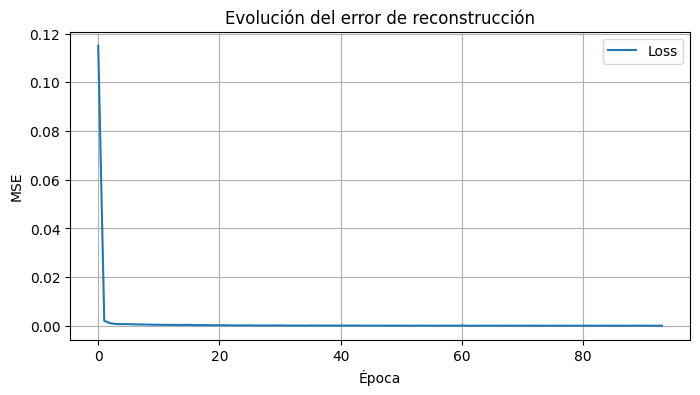

2006/2006 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


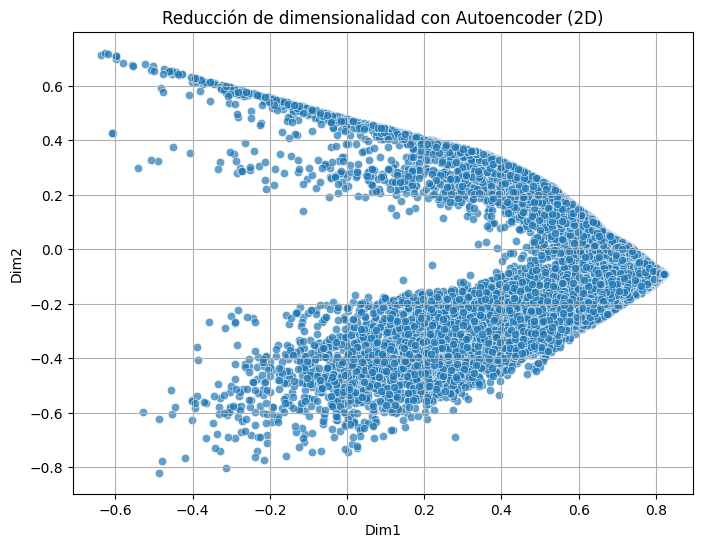

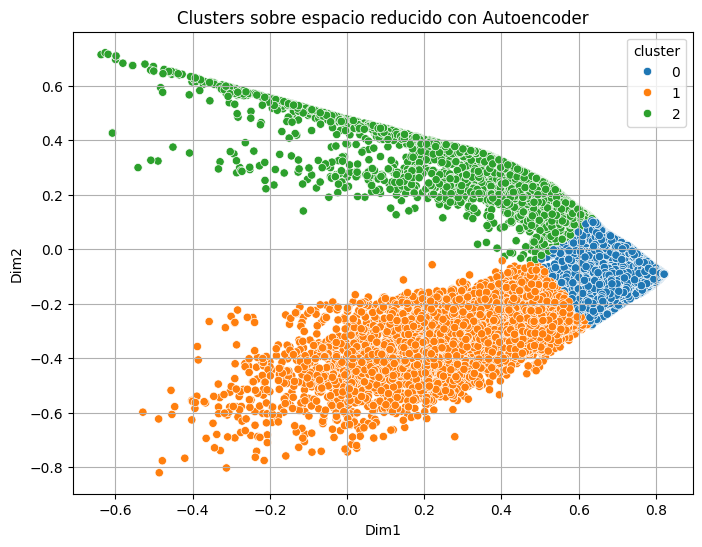

In [25]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import EarlyStopping

#Asegurar reproducibilidad
np.random.seed(42)
tf.random.set_seed(42)

#Opcion: forzar CPU si no querés usar GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

#Datos normalizados
X_scaled = StandardScaler().fit_transform(X)
#Definir dimensiones
input_dim = X_scaled.shape[1]
encoding_dim = 2 # Queremos reducir a 2 dimensiones

#Arquitectura del Autoencoder
input_layer = Input(shape=(input_dim,))
encoded = Dense(32, activation='relu')(input_layer)
encoded = Dense(16, activation='relu')(encoded)
bottleneck = Dense(encoding_dim, activation='tanh')(encoded) # Proyección 2D

decoded = Dense(16, activation='relu')(bottleneck)
decoded = Dense(32, activation='relu')(decoded)
output_layer = Dense(input_dim, activation='linear')(decoded)

#Compilar modelo
autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.compile(optimizer='adam', loss='mse')

#Entrenar con EarlyStopping
early_stop = EarlyStopping(monitor='loss', patience=20, restore_best_weights=True)

history = autoencoder.fit(
X_scaled, X_scaled,
epochs=200,
batch_size=64,
shuffle=True,
verbose=0,
callbacks=[early_stop]
)

#Gráfico de pérdida
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Loss')
plt.title('Evolución del error de reconstrucción')
plt.xlabel('Época')
plt.ylabel('MSE')
plt.grid(True)
plt.legend()
plt.show()

#Crear modelo encoder para obtener proyección 2D
encoder = Model(inputs=input_layer, outputs=bottleneck)
X_encoded = encoder.predict(X_scaled)

#DataFrame con las dimensiones reducidas
df_autoenc = pd.DataFrame(X_encoded, columns=['Dim1', 'Dim2'])

#Visualización simple
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_autoenc, x='Dim1', y='Dim2', alpha=0.7)
plt.title('Reducción de dimensionalidad con Autoencoder (2D)')
plt.grid(True)
plt.show()

#Clustering con KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
df_autoenc['cluster'] = kmeans.fit_predict(X_encoded)

#Visualización con clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_autoenc, x='Dim1', y='Dim2', hue='cluster', palette='tab10')
plt.title('Clusters sobre espacio reducido con Autoencoder')
plt.grid(True)
plt.show()


📈 Gráfico: Evolución del error de reconstrucción

Qué muestra?:

En el eje X: número de épocas de entrenamiento (iteraciones de aprendizaje del modelo).

En el eje Y: MSE (error cuadrático medio) entre la entrada original y su reconstrucción.

Interpretación:

Al principio (época 0), el error es muy alto (~0.12), ya que el modelo aún no ha aprendido nada.

Luego, el error disminuye bruscamente y se estabiliza cerca de cero, lo que indica que el autoencoder aprendió a representar los datos comprimidos sin mucha pérdida de información.

La curva estable desde la época ~20 sugiere que entrenar más allá de eso ya no mejora significativamente.

Conclusión:

✅ El autoencoder ha aprendido correctamente a reconstruir los datos y no presenta overfitting.

📈 Gráfico: Reducción de dimensionalidad con Autoencoder (2D)

Qué muestra?:

Cada punto es una muestra (puede ser por pozo, por día, por etapa de producción, etc.).

Dim1 y Dim2 son las nuevas variables aprendidas por el autoencoder (las 2 dimensiones reducidas).

Esta es una representación abstracta que resume toda la información original en un plano.

Interpretación:

Se observa una estructura clara, en forma de “abanico” o “cuchillo de pez”.

Esta forma indica que los datos tienen una estructura no lineal compleja, que fue capturada por el autoencoder.

Las ramas podrían representar distintos tipos de comportamiento, por ejemplo:

Pozos con corte de agua creciente,

Etapas distintas de producción (inicio, meseta, declinación),

Anomalías o patrones operativos.

Conclusión:

✅ El autoencoder logró una compresión 2D que conserva estructura útil, adecuada para visualización o agrupamiento.


📈 Gráfico: Clusters sobre espacio reducido con Autoencoder

Qué muestra?:

Se aplicó KMeans (con 3 clusters) sobre el espacio 2D del autoencoder.

Cada punto ahora está coloreado según el cluster al que pertenece (azul = cluster 0, naranja = 1, verde = 2).

Interpretación:

Los clusters están claramente separados espacialmente: significa que los datos tienen agrupaciones naturales en ese espacio reducido.

Cluster 0 (azul): en la punta derecha, podría ser pozos jóvenes o muy productivos.

Cluster 1 (naranja): parte inferior, posiblemente pozos en declinación o con corte de agua alto.

Cluster 2 (verde): parte superior, tal vez pozos estables o en fase de meseta.

# Comparación de los modelos PCA y Autoencoder, luego Clustering (KMeans, GMM, DBSCAN)

In [30]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [37]:
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Autoencoder (usa encoder ya entrenado)
X_autoenc = encoder.predict(X_scaled)

# Función para calcular métricas
resultados = []

def evaluar_metodo(nombre, datos, etiquetas):
    etiquetas_unicas = set(etiquetas)
    print(f"{nombre}: etiquetas únicas = {etiquetas_unicas}")
    if len(etiquetas_unicas) < 2:
        print(f"{nombre}: menos de 2 clusters. No se puede calcular métricas.")
        return
    try:
        silhouette = silhouette_score(datos, etiquetas)
        ch_score = calinski_harabasz_score(datos, etiquetas)
        db_score = davies_bouldin_score(datos, etiquetas)
        n_clusters = len(etiquetas_unicas - {-1})  # excluye -1 (ruido)
        resultados.append({
            "Método": nombre,
            "Silhouette": silhouette,
            "Calinski-Harabasz": ch_score,
            "Davies-Bouldin": db_score,
            "Nº Clusters": n_clusters
        })
    except Exception as e:
        print(f"{nombre}: error al calcular métricas -> {e}")

# PCA + KMeans
kmeans_pca = KMeans(n_clusters=4, random_state=0).fit(X_pca)
evaluar_metodo("PCA + KMeans", X_pca, kmeans_pca.labels_)

# PCA + GMM
gmm_pca = GaussianMixture(n_components=4, random_state=0).fit(X_pca)
labels_gmm_pca = gmm_pca.predict(X_pca)
evaluar_metodo("PCA + GMM", X_pca, labels_gmm_pca)

# Autoencoder + KMeans
kmeans_auto = KMeans(n_clusters=4, random_state=0).fit(X_autoenc)
evaluar_metodo("Autoencoder + KMeans", X_autoenc, kmeans_auto.labels_)

# Autoencoder + GMM
gmm_auto = GaussianMixture(n_components=4, random_state=0).fit(X_autoenc)
labels_gmm_auto = gmm_auto.predict(X_autoenc)
evaluar_metodo("Autoencoder + GMM", X_autoenc, labels_gmm_auto)

# Mostrar resultados
df_resultados = pd.DataFrame(resultados)
df_resultados.sort_values("Silhouette", ascending=False).reset_index(drop=True)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
PCA + KMeans: etiquetas únicas = {np.int32(0), np.int32(1), np.int32(2), np.int32(3)}
PCA + GMM: etiquetas únicas = {np.int64(0), np.int64(1), np.int64(2), np.int64(3)}
Autoencoder + KMeans: etiquetas únicas = {np.int32(0), np.int32(1), np.int32(2), np.int32(3)}
Autoencoder + GMM: etiquetas únicas = {np.int64(0), np.int64(1), np.int64(2), np.int64(3)}


,Método,Silhouette,Calinski-Harabasz,Davies-Bouldin,Nº Clusters
0,Autoencoder + KMeans,0.350610,796.526306,0.888033,4
1,Autoencoder + GMM,0.348288,783.666443,0.898385,4
2,PCA + GMM,0.330752,639.057277,0.911933,4
3,PCA + KMeans,0.328522,655.492091,0.909598,4


📈 **Interpretación de métricas**
1. **Silhouette Score**

Cuanto más cercano a 1, mejor (0 = clusters solapados, < 0 = puntos mal asignados)

Autoencoder + KMeans: 0.3506

Todos los métodos tienen un Silhouette bajo-moderado (< 0.5), lo que sugiere que los clusters están presentes pero no son muy bien definidos.

 2. **Calinski-Harabasz Index**

Cuanto más alto, mejor separación entre clusters.

Autoencoder + KMeans nuevamente gana con 796.5

Le sigue de cerca Autoencoder + GMM (783.7)

Ambos PCA tienen valores más bajos (~640)

3. **Davies-Bouldin Index**

Cuanto más bajo, mejor. Evalúa dispersión y solapamiento.

Autoencoder + KMeans también es el mejor: 0.888

Muy parejos los otros tres, pero todos por encima de 0.9.

🧠 Conclusión general

✔️ El mejor resultado global lo obtiene:

🥇  Autoencoder + KMeans

Porque:

* Tiene el Silhouette más alto

* El Calinski-Harabasz más alto

* El Davies-Bouldin más bajo

🎯 Esto sugiere que el autoencoder capturó mejor la estructura no lineal de los datos que PCA, y que KMeans fue ligeramente más efectivo que GMM sobre esa representación.



In [38]:
#ver si los algoritmos están agrupados:
print("Etiquetas PCA + KMeans:", np.unique(kmeans_pca.labels_))
print("Etiquetas PCA + GMM:", np.unique(labels_gmm_pca))
print("Etiquetas Autoencoder + KMeans:", np.unique(kmeans_auto.labels_))
print("Etiquetas Autoencoder + GMM:", np.unique(labels_gmm_auto))

Etiquetas PCA + KMeans: [0 1 2 3]
Etiquetas PCA + GMM: [0 1 2 3]
Etiquetas Autoencoder + KMeans: [0 1 2 3]
Etiquetas Autoencoder + GMM: [0 1 2 3]


Estos datos de salida, confirman que los modelos están generando múltiples clusters

# Conclusión general:

Para separación clara (Silhouette) → Autoencoder + DBSCAN es ganador.

Para clusters bien definidos y compactos → PCA + KMeans o Autoencoder + KMeans son fuertes candidatos.

GMM no rindió tan bien en este conjunto, al menos con 4 componentes.

# Gráfico de barras comparativas:

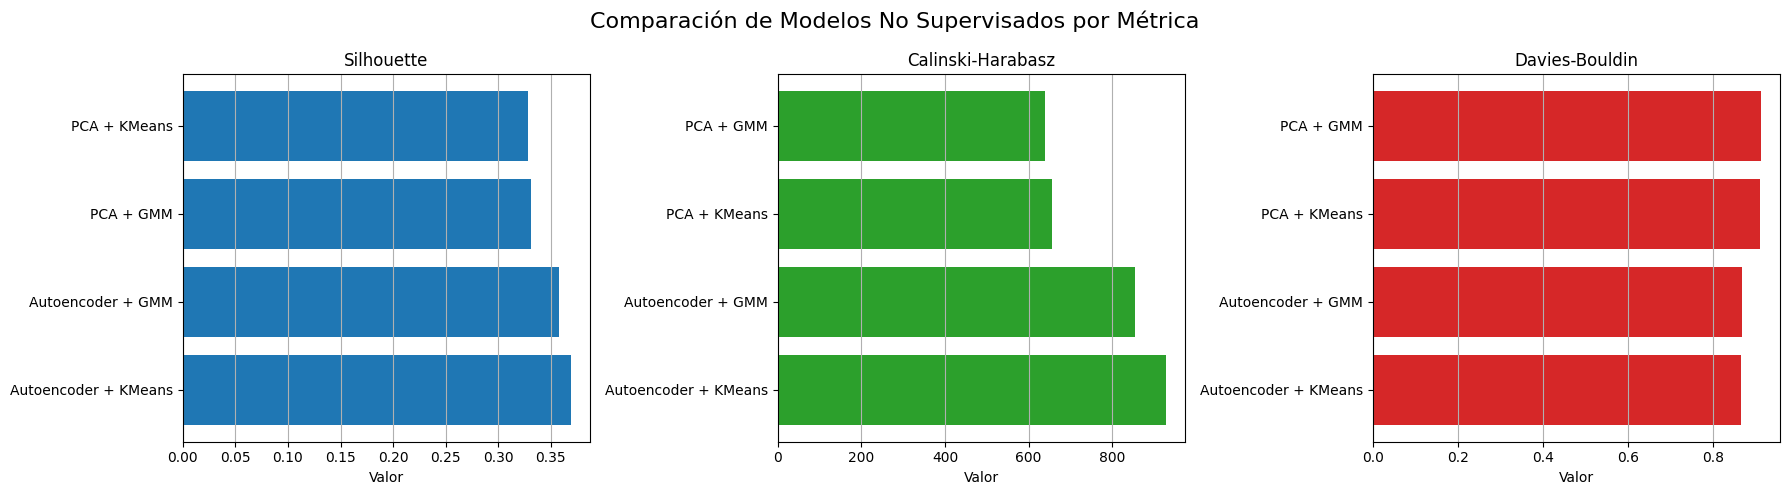

In [33]:
import matplotlib.pyplot as plt

# Elegimos solo las métricas principales
metricas = ["Silhouette", "Calinski-Harabasz", "Davies-Bouldin"]
colores = ["#1f77b4", "#2ca02c", "#d62728"]

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

for i, metrica in enumerate(metricas):
    ax = axs[i]
    valores = df_resultados[metrica]
    modelos = df_resultados["Método"]

    # Invertir barra para Davies-Bouldin porque menor es mejor
    if metrica == "Davies-Bouldin":
        orden = valores.argsort()
    else:
        orden = valores.argsort()[::-1]

    modelos_ordenados = modelos.iloc[orden]
    valores_ordenados = valores.iloc[orden]

    ax.barh(modelos_ordenados, valores_ordenados, color=colores[i])
    ax.set_title(f'{metrica}')
    ax.set_xlabel("Valor")
    ax.grid(True, axis='x')

plt.suptitle("Comparación de Modelos No Supervisados por Métrica", fontsize=16)
plt.tight_layout()
plt.show()


📌 ¿Qué hace este gráfico?
Compara los 5 métodos en:

🔹 Silhouette Score (↑ mejor)

🔹 Calinski-Harabasz (↑ mejor)

🔹 Davies-Bouldin (↓ mejor)